# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Setareh
* **Last Name** : Dehghanfard
* **SID** : 810002005 🆔

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [ ]:
df = pd.read_csv('hotels_in_europe.csv')

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


<Axes: >

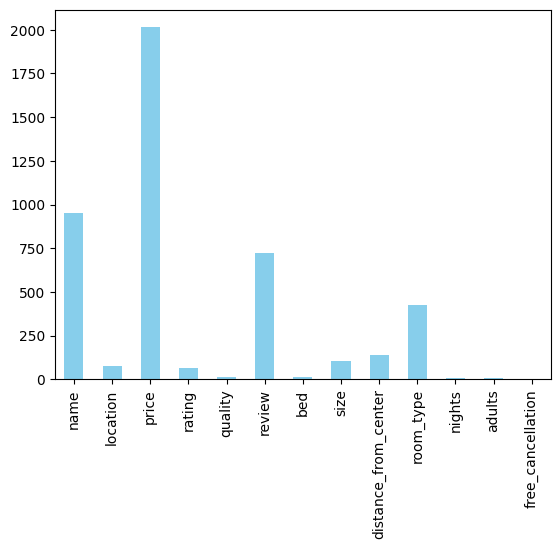

In [ ]:
df.nunique().plot(kind='bar', color='skyblue')

<Axes: xlabel='rating', ylabel='Count'>

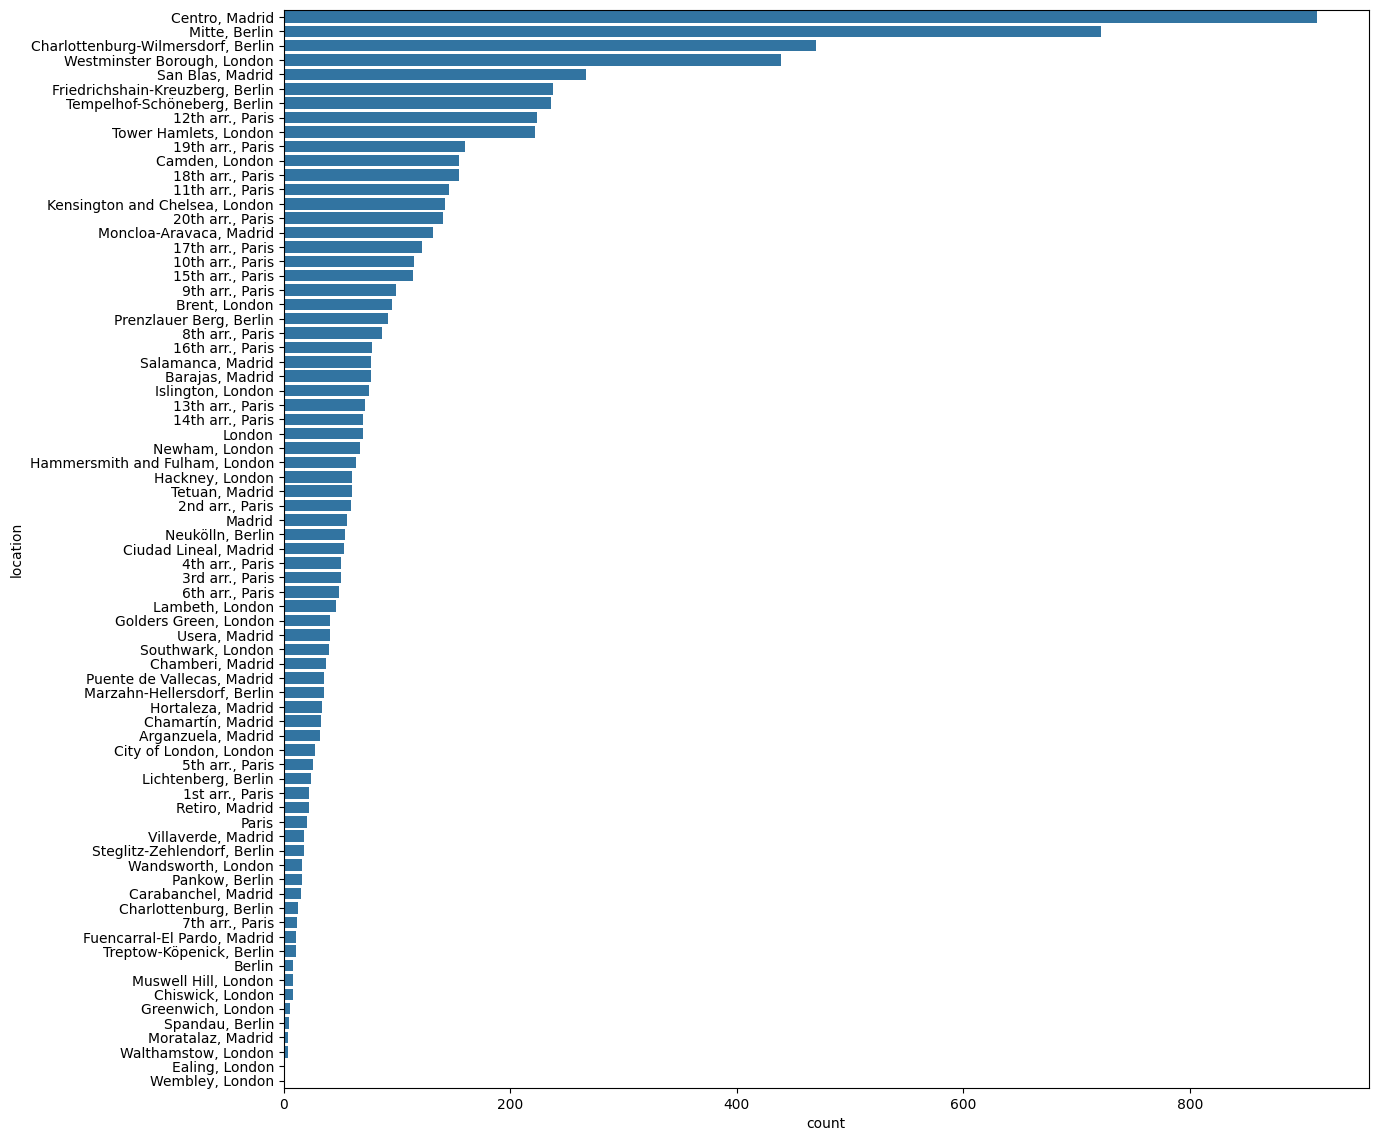

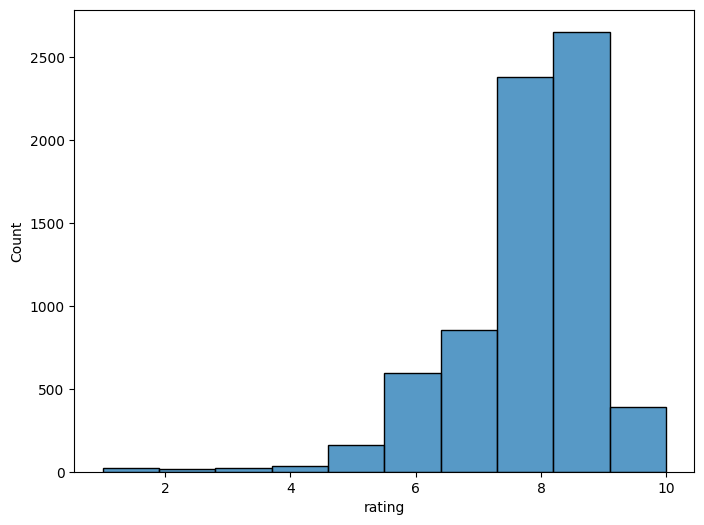

In [ ]:
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.countplot(y=df['location'], data=df, order=df['location'].value_counts().index)
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10)

In [ ]:
df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['review'] = df['review'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['bed'] = df['bed'].str.extract('(\d+)', expand=False).astype(float)
df['nights'] = df['nights'].str.extract('(\d+)', expand=False).astype(float)
df['adults'] = df['adults'].str.extract('(\d+)', expand=False).astype(float)
df['size'] = df['size'].str.extract('(\d+)', expand=False).astype(float)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

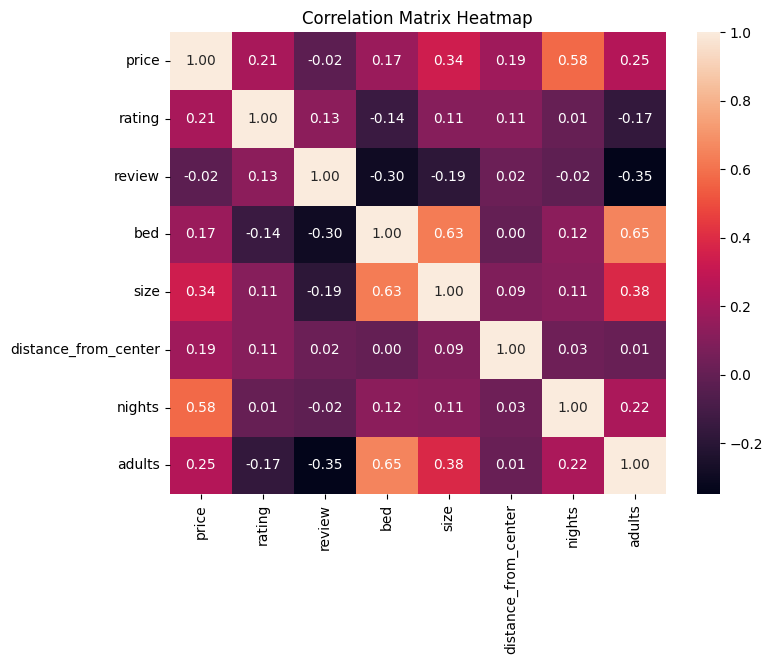

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')

<Axes: xlabel='price', ylabel='quality'>

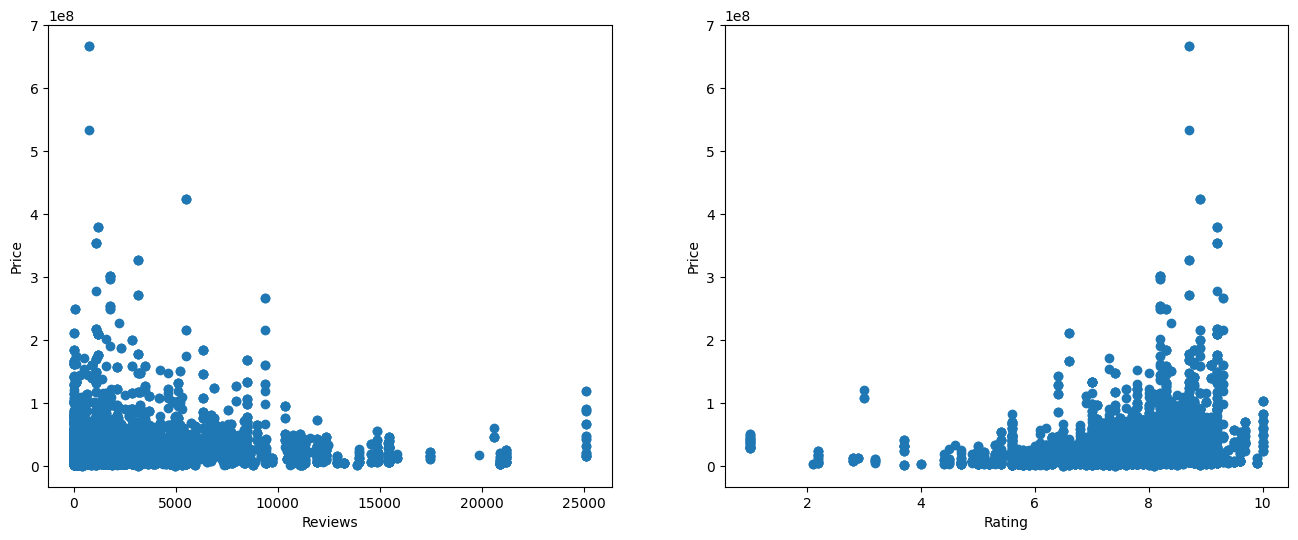

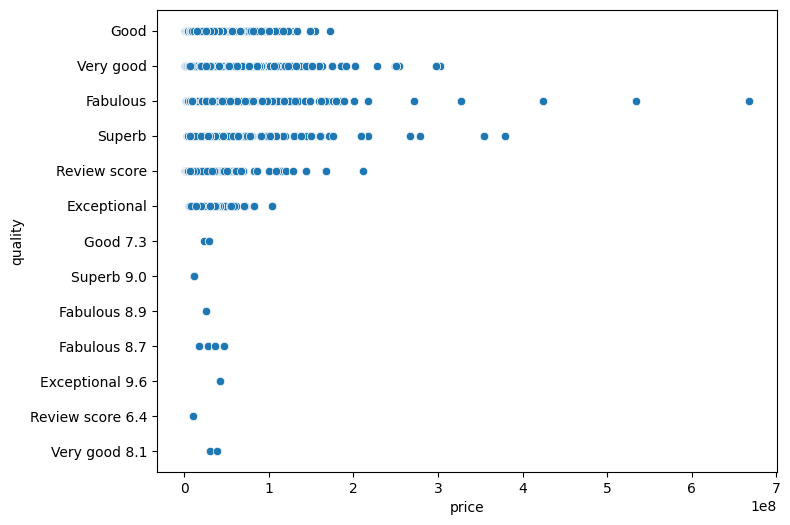

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(df['review'],df['price'])
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(df['rating'],df['price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='quality')

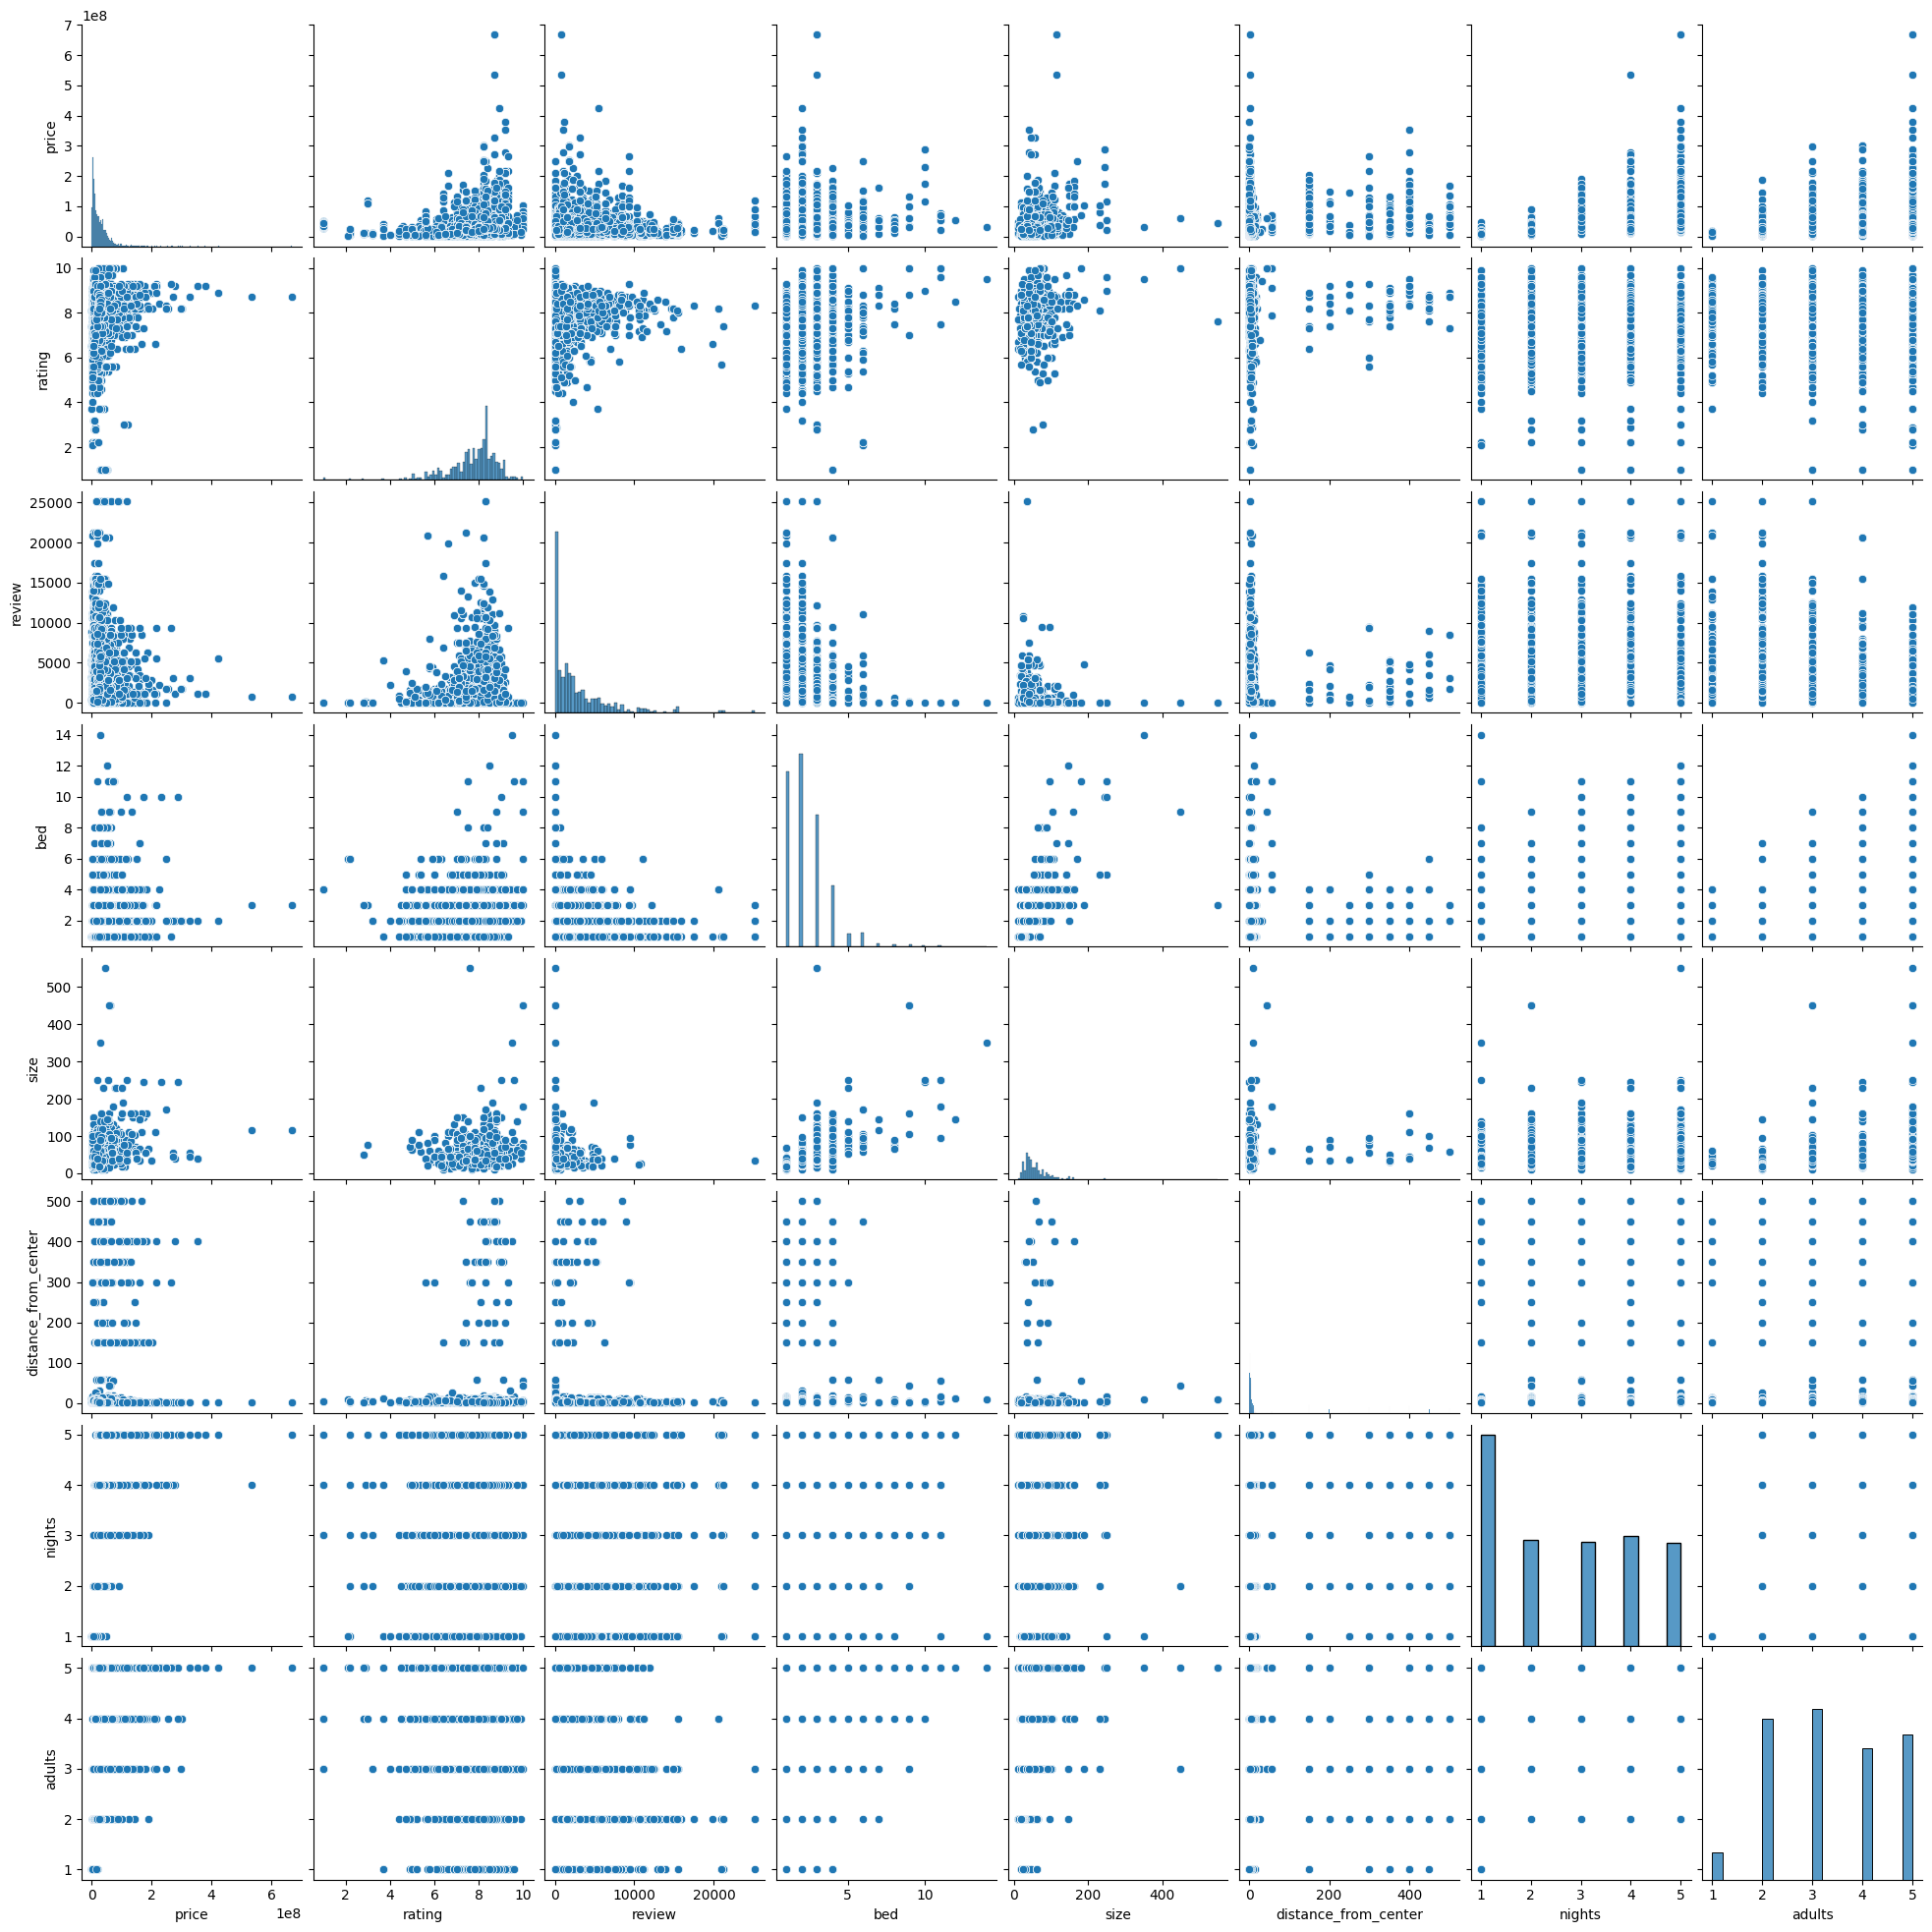

In [ ]:
sns.pairplot(df)

<Axes: >

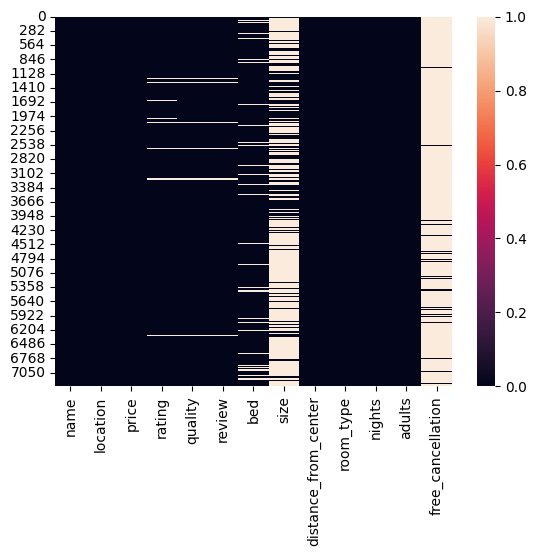

In [ ]:
sns.heatmap(df.isnull())

### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [ ]:
df = pd.read_csv('hotels_in_europe.csv')
## Extract numerical values
df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['review'] = df['review'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['bed'] = df['bed'].str.extract('(\d+)', expand=False).astype(float)
df['nights'] = df['nights'].str.extract('(\d+)', expand=False).astype(float)
df['adults'] = df['adults'].str.extract('(\d+)', expand=False).astype(float)
df['size'] = df['size'].str.extract('(\d+)', expand=False).astype(float)

In [ ]:
## Cancellation to numerical
df['free_cancellation'] = df['free_cancellation'].apply(lambda x: 1 if 'free cancellation' in str(x).lower() else 0)

In [ ]:
## Quality to numerical
df['quality'] = df['quality'].str.replace(r'\d+(\.\d+)?', '', regex=True).str.strip()
quality_mapping = {'Good': 1, 'Very good': 2, 'Fabulous': 3, 'Superb': 4,'Exceptional': 5}
df['quality'] = df['quality'].map(quality_mapping)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
## City to numerical
cities = ['Paris', 'Berlin', 'Madrid', 'London']
df['city'] = df['location'].apply(lambda x: next((city for city in cities if city in x), 'Unknown'))
city_mapping = {'Paris': 1, 'Berlin': 2, 'Madrid': 3, 'London': 4}
df['city'] = df['city'].map(city_mapping)

In [ ]:
df

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation,city
0,WIT Hotel,"9th arr., Paris",7951542.0,7.1,1.0,3300.0,1.0,20.0,1.9,Suite,1.0,1.0,0,1
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris",1397677.0,8.0,2.0,5921.0,1.0,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1.0,1.0,0,1
2,Timhotel Montmartre,"18th arr., Paris",7569083.0,8.3,2.0,2532.0,1.0,NaN,3.4,Comfort Single Room,1.0,1.0,0,1
3,Hôtel Galileo Champs Elysées,"8th arr., Paris",6447737.0,8.6,3.0,1457.0,1.0,NaN,4.2,Classic Room,1.0,1.0,0,1
4,Hôtel Le Daum,"12th arr., Paris",7913496.0,8.3,2.0,1273.0,1.0,NaN,4.1,Comfort Double Room,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,"Mitte, Berlin",31998398.0,8.0,2.0,5933.0,1.0,NaN,0.9,Superior Double Room,4.0,2.0,0,2
7318,Hotel Domicil Berlin by Golden Tulip,"Charlottenburg-Wilmersdorf, Berlin",14817781.0,7.7,1.0,1546.0,2.0,NaN,4.9,Standard Twin Room,4.0,2.0,0,2
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin",30236284.0,8.3,2.0,5813.0,NaN,NaN,2.8,Standard Room,4.0,2.0,0,2
7320,Leonardo Hotel Berlin KU'DAMM,"Charlottenburg-Wilmersdorf, Berlin",19503404.0,8.0,2.0,8631.0,1.0,NaN,3.9,Comfort Double Room,4.0,2.0,1,2


### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [ ]:
#df['price per adult per night'] = df['price'] / df['adults'] / df['nights']

In [ ]:
df = df.drop(columns=['name', 'location', 'room_type'])

In [ ]:
df

,price,rating,quality,review,bed,size,distance_from_center,nights,adults,free_cancellation,city,price per adult per night
0,7951542.0,7.1,1.0,3300.0,1.0,20.0,1.9,1.0,1.0,0,1,7951542.000
1,1397677.0,8.0,2.0,5921.0,1.0,NaN,4.6,1.0,1.0,0,1,1397677.000
2,7569083.0,8.3,2.0,2532.0,1.0,NaN,3.4,1.0,1.0,0,1,7569083.000
3,6447737.0,8.6,3.0,1457.0,1.0,NaN,4.2,1.0,1.0,0,1,6447737.000
4,7913496.0,8.3,2.0,1273.0,1.0,NaN,4.1,1.0,1.0,0,1,7913496.000
...,...,...,...,...,...,...,...,...,...,...,...,...
7317,31998398.0,8.0,2.0,5933.0,1.0,NaN,0.9,4.0,2.0,0,2,3999799.750
7318,14817781.0,7.7,1.0,1546.0,2.0,NaN,4.9,4.0,2.0,0,2,1852222.625
7319,30236284.0,8.3,2.0,5813.0,NaN,NaN,2.8,4.0,2.0,0,2,3779535.500
7320,19503404.0,8.0,2.0,8631.0,1.0,NaN,3.9,4.0,2.0,1,2,2437925.500


### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [ ]:
# Code Here
## file with mode
'''
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['quality'].fillna(df['quality'].mode()[0], inplace=True)
df['review'].fillna(df['review'].mode()[0], inplace=True)
'''

## fill with mean
'''
df['size'].fillna(df['size'].mean(), inplace=True)
'''

## fill with median
df['size'] = df['size'].fillna(df['size'].median())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['bed'] = df['bed'].fillna(df['bed'].median())
df['quality'] = df['quality'].fillna(df['quality'].median())
df['review'] = df['review'].fillna(df['review'].median())


In [ ]:
print(df.isna().sum())

price                   0
rating                  0
quality                 0
review                  0
bed                     0
size                    0
distance_from_center    0
nights                  0
adults                  0
free_cancellation       0
city                    0
dtype: int64


### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [ ]:
def assign_label(x, column):
    """
        x:price(int),
        column:"price"(str),
        returns label of x as explained
    """
    threshold = np.median(df[column])
    return 1 if x >= threshold else 0

#df['price per adult per night'] = df['price per adult per night'].apply(assign_label, column='price per adult per night')
df['price'] = df['price'].apply(assign_label, column='price')

In [ ]:
df

,price,rating,quality,review,bed,size,distance_from_center,nights,adults,free_cancellation,city,price per adult per night
0,0,7.1,1.0,3300.0,1.0,20.0,1.9,1.0,1.0,0,1,7951542.000
1,0,8.0,2.0,5921.0,1.0,48.0,4.6,1.0,1.0,0,1,1397677.000
2,0,8.3,2.0,2532.0,1.0,48.0,3.4,1.0,1.0,0,1,7569083.000
3,0,8.6,3.0,1457.0,1.0,48.0,4.2,1.0,1.0,0,1,6447737.000
4,0,8.3,2.0,1273.0,1.0,48.0,4.1,1.0,1.0,0,1,7913496.000
...,...,...,...,...,...,...,...,...,...,...,...,...
7317,1,8.0,2.0,5933.0,1.0,48.0,0.9,4.0,2.0,0,2,3999799.750
7318,0,7.7,1.0,1546.0,2.0,48.0,4.9,4.0,2.0,0,2,1852222.625
7319,1,8.3,2.0,5813.0,2.0,48.0,2.8,4.0,2.0,0,2,3779535.500
7320,0,8.0,2.0,8631.0,1.0,48.0,3.9,4.0,2.0,1,2,2437925.500


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

In [ ]:
# Code Here

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [ ]:
# Code Here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['review', 'size', 'distance_from_center']] = scaler.fit_transform(df[['review', 'size', 'distance_from_center']])

In [ ]:
df

,price,rating,quality,review,bed,size,distance_from_center,nights,adults,free_cancellation,city
0,0,7.1,1.0,0.131309,1.0,0.018519,0.002803,1.0,1.0,0,1
1,0,8.0,2.0,0.235631,1.0,0.070370,0.008208,1.0,1.0,0,1
2,0,8.3,2.0,0.100740,1.0,0.070370,0.005806,1.0,1.0,0,1
3,0,8.6,3.0,0.057953,1.0,0.070370,0.007407,1.0,1.0,0,1
4,0,8.3,2.0,0.050629,1.0,0.070370,0.007207,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7317,1,8.0,2.0,0.236109,1.0,0.070370,0.000801,4.0,2.0,0,2
7318,0,7.7,1.0,0.061495,2.0,0.070370,0.008809,4.0,2.0,0,2
7319,1,8.3,2.0,0.231333,2.0,0.070370,0.004605,4.0,2.0,0,2
7320,0,8.0,2.0,0.343496,1.0,0.070370,0.006807,4.0,2.0,1,2


### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [ ]:
# Code Here
from sklearn.model_selection import train_test_split
#X = df.drop(columns=['price'])
#y = df['price']
df_train, df_test= train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.drop(columns=['price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['price'])
y_test = df_test['price']


### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def evaluation(y_true, y_predict):

    cm = confusion_matrix(y_true, y_predict)

    recall = recall_score(y_true, y_predict, average=None)
    recall_weighted = recall_score(y_true, y_predict, average='weighted')
    recall_micro = recall_score(y_true, y_predict, average='micro')
    recall_macro = recall_score(y_true, y_predict, average='macro')

    f1 = f1_score(y_true, y_predict, average=None)
    f1_weighted = f1_score(y_true, y_predict, average='weighted')
    f1_micro = f1_score(y_true, y_predict, average='micro')
    f1_macro = f1_score(y_true, y_predict, average='macro')

    precision = precision_score(y_true, y_predict, average=None)
    precision_weighted = precision_score(y_true, y_predict, average='weighted')
    precision_micro = precision_score(y_true, y_predict, average='micro')
    precision_macro = precision_score(y_true, y_predict, average='macro')

    accuracy = accuracy_score(y_true, y_predict)

    metrics = {
        'Metric': ['class 0', 'class 1', 'macro average', 'micro average', 'weighted average'],
        'Recall': [recall[0], recall[1], recall_macro, recall_micro, recall_weighted],
        'F1-Score': [f1[0], f1[1], f1_macro, f1_micro, f1_weighted],
        'Precision': [precision[0], precision[1], precision_macro, precision_micro, precision_weighted],
    }
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)
    print("\nConfusion Matrix:\n", cm)
    print("\nAccuracy:", accuracy)

#### 📉 Gaussian Naive Bayes

In [ ]:
# Code Here
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

y_pred_gb = model_GNB.predict(X_test)

evaluation(y_test, y_pred_gb)

             Metric    Recall  F1-Score  Precision
0           class 0  0.886640  0.840153   0.798299
1           class 1  0.770718  0.816984   0.869159
2     macro average  0.828679  0.828569   0.833729
3     micro average  0.829352  0.829352   0.829352
4  weighted average  0.829352  0.828703   0.833318

Confusion Matrix:
 [[657  84]
 [166 558]]

Accuracy: 0.8293515358361775


#### 🌳 Decision Tree Classifier

Fitting 3 folds for each of 10 candidates, totalling 30 fits
             Metric  Recall  F1-Score  Precision
0           class 0     1.0       1.0        1.0
1           class 1     1.0       1.0        1.0
2     macro average     1.0       1.0        1.0
3     micro average     1.0       1.0        1.0
4  weighted average     1.0       1.0        1.0

Confusion Matrix:
 [[741   0]
 [  0 724]]

Accuracy: 1.0
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.0}


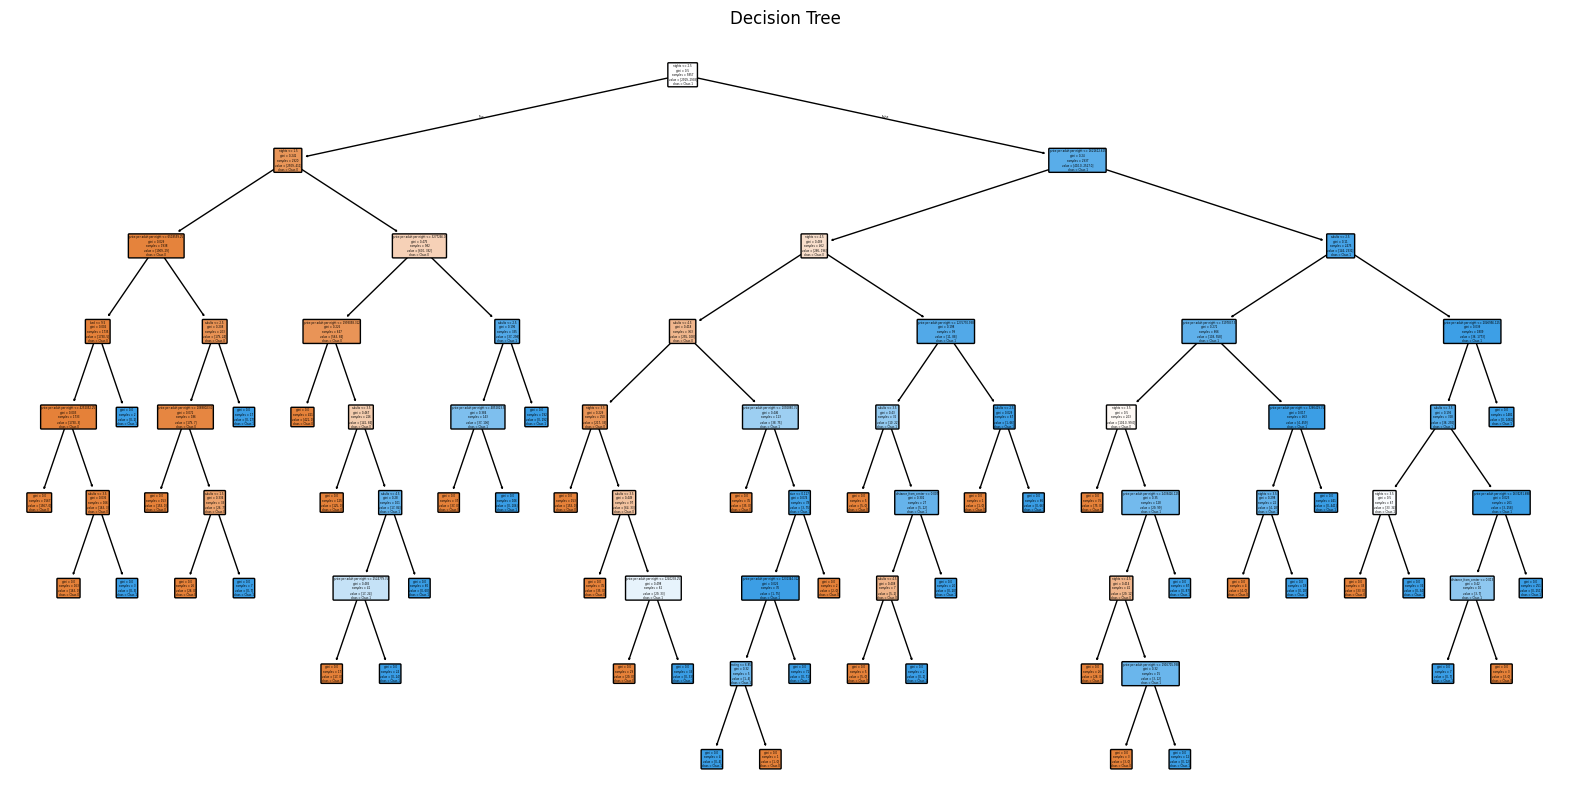

In [ ]:
# Code Here
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV

param_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'ccp_alpha': np.linspace(0, 0.02, 5),
}

model_DT = DecisionTreeClassifier(random_state=42)
model_DT = RandomizedSearchCV(estimator = model_DT, param_distributions = param_DT, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

model_DT.fit(X_train, y_train)

y_pred_dt = model_DT.predict(X_test)

evaluation(y_test, y_pred_dt)

print("Best Parameters:", model_DT.best_params_)

plt.figure(figsize=(20, 10))
plot_tree(model_DT.best_estimator_, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Decision Tree")
plt.show()

#### 🌲🌳 Random Forest Classifier

In [ ]:
# Code Here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params_RF = {'n_estimators': np.arange(500, 1000, 100),
            'max_features': ['sqrt', 'log2', None],
            'max_depth': [10, 20, 40, 60, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
             }

model_RF = RandomForestClassifier(random_state=42)
model_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

model_RF.fit(X_train, y_train)

y_pred_rf = model_RF.predict(X_test)

evaluation(y_test, y_pred_rf)

print("Best Parameters:", model_RF.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
             Metric    Recall  F1-Score  Precision
0           class 0  1.000000  0.998652   0.997308
1           class 1  0.997238  0.998617   1.000000
2     macro average  0.998619  0.998635   0.998654
3     micro average  0.998635  0.998635   0.998635
4  weighted average  0.998635  0.998635   0.998638

Confusion Matrix:
 [[741   0]
 [  2 722]]

Accuracy: 0.9986348122866894
Best Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}


#### ⚡️ Adaptive Boosting

In [ ]:
# Code Here
from sklearn.ensemble import AdaBoostClassifier

model_AB_100 = AdaBoostClassifier(random_state=42, n_estimators = 50)
model_AB_100.fit(X_train, y_train)

y_pred_ab_100 = model_AB_100.predict(X_test)

print("Results for n = 50")
evaluation(y_test, y_pred_ab_100)

model_AB_500 = AdaBoostClassifier(random_state=42, n_estimators = 100)
model_AB_500.fit(X_train, y_train)

y_pred_ab_500 = model_AB_500.predict(X_test)

print("Results for n = 100")
evaluation(y_test, y_pred_ab_500)

model_AB_1000 = AdaBoostClassifier(random_state=42, n_estimators = 200)
model_AB_1000.fit(X_train, y_train)

y_pred_ab_1000 = model_AB_1000.predict(X_test)

print("Results for n = 200")
evaluation(y_test, y_pred_ab_1000)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for n = 50
             Metric    Recall  F1-Score  Precision
0           class 0  0.991903  0.993243   0.994587
1           class 1  0.994475  0.993103   0.991736
2     macro average  0.993189  0.993173   0.993161
3     micro average  0.993174  0.993174   0.993174
4  weighted average  0.993174  0.993174   0.993178

Confusion Matrix:
 [[735   6]
 [  4 720]]

Accuracy: 0.9931740614334471


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for n = 100
             Metric    Recall  F1-Score  Precision
0           class 0  0.997301  0.997301   0.997301
1           class 1  0.997238  0.997238   0.997238
2     macro average  0.997269  0.997269   0.997269
3     micro average  0.997270  0.997270   0.997270
4  weighted average  0.997270  0.997270   0.997270

Confusion Matrix:
 [[739   2]
 [  2 722]]

Accuracy: 0.9972696245733789


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for n = 200
             Metric  Recall  F1-Score  Precision
0           class 0     1.0       1.0        1.0
1           class 1     1.0       1.0        1.0
2     macro average     1.0       1.0        1.0
3     micro average     1.0       1.0        1.0
4  weighted average     1.0       1.0        1.0

Confusion Matrix:
 [[741   0]
 [  0 724]]

Accuracy: 1.0


#### ⚡️ XGBoost

In [ ]:
# Code Here
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_XGB = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': np.arange(500, 1000, 200),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [10, None],
    'max_features': ['sqrt', 'log2', None],
}

model_XGB = xgb.XGBClassifier(random_state=42)
model_XGB = GridSearchCV(estimator=model_XGB, param_grid=param_XGB, cv=3, verbose=1, n_jobs=-1)
model_XGB.fit(X_train, y_train)

y_pred_xgb = model_XGB.predict(X_test)

evaluation(y_test, y_pred_xgb)

print("Best Parameters:", model_XGB.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:07:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


             Metric  Recall  F1-Score  Precision
0           class 0     1.0       1.0        1.0
1           class 1     1.0       1.0        1.0
2     macro average     1.0       1.0        1.0
3     micro average     1.0       1.0        1.0
4  weighted average     1.0       1.0        1.0

Confusion Matrix:
 [[741   0]
 [  0 724]]

Accuracy: 1.0
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}


### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # initialize weights uniformly
        for _ in range(self.n_estimators):
            learner = GaussianNB() # instanciate model
            learner.fit(X, y, sample_weight=self.weights) # fit to samples, using weights
            pred = learner.predict(X) # predict the batch
            missClassified = pred != y # get index of misclassified samples
            # TODO : compute learner error rate according to SAMME algorithm
            learner_error = np.sum(self.weights * missClassified) / np.sum(self.weights)
            # TODO : compute learner weight using SAMME algorithm
            learner_weight = np.log((1 - learner_error) / learner_error) + np.log(2 - 1)
            # TODO : a classifier with error rate which is worse than random should be dropped
            # hint : error rate of untrained classifier : 1 - (1 / n_classes)
            if learner_error >= 1 - 1 / 2:
                break
            # TODO : increase the weights of misclassified samples according to SAMME algorithm
            self.weights *= np.exp(learner_weight * missClassified)
            self.weights /= np.sum(self.weights) # renormalize weights to make them sum up to 1
            self.learners.append(learner)
            # TODO : store learner weight in self.learner_weights
            self.learner_weights.append(learner_weight)
    def predict(self, X):
        # note that X can contain multiple samples in shape of array, in which, each row corresponds to a query
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X)) # collect predictions from each learner
        # TODO : weighted vote for each sample's prediction across all learners, each learner's weight is stored in self.learner_weights
        weighted_vote = np.zeros((len(X), 2))
        for i in range(len(predictionsOfLearners)):
            for j in range(len(X)):
                weighted_vote[j, predictionsOfLearners[i][j]] += self.learner_weights[i]
        # TODO : make final prediction by considering the label which has highest weighted vote
        final_prediction = np.argmax(weighted_vote, axis=1)

        return final_prediction


In [ ]:
model_BfS = SimpleMultiClassBoosting()
model_BfS.fit(X_train, y_train)

y_pred_xgb = model_BfS.predict(X_test)

evaluation(y_test, y_pred_xgb)


             Metric    Recall  F1-Score  Precision
0           class 0  0.842105  0.855967   0.870293
1           class 1  0.871547  0.857337   0.843583
2     macro average  0.856826  0.856652   0.856938
3     micro average  0.856655  0.856655   0.856655
4  weighted average  0.856655  0.856644   0.857093

Confusion Matrix:
 [[624 117]
 [ 93 631]]

Accuracy: 0.856655290102389
